In [2]:
#library imports and warning removal 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
twitch_data = pd.read_csv("Twitch_game_data.csv")

In [4]:
twitch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              17400 non-null  int64  
 1   Game              17399 non-null  object 
 2   Month             17400 non-null  int64  
 3   Year              17400 non-null  int64  
 4   Hours_watched     17400 non-null  int64  
 5   Hours_streamed    17400 non-null  int64  
 6   Peak_viewers      17400 non-null  int64  
 7   Peak_channels     17400 non-null  int64  
 8   Streamers         17400 non-null  int64  
 9   Avg_viewers       17400 non-null  int64  
 10  Avg_channels      17400 non-null  int64  
 11  Avg_viewer_ratio  17400 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.6+ MB


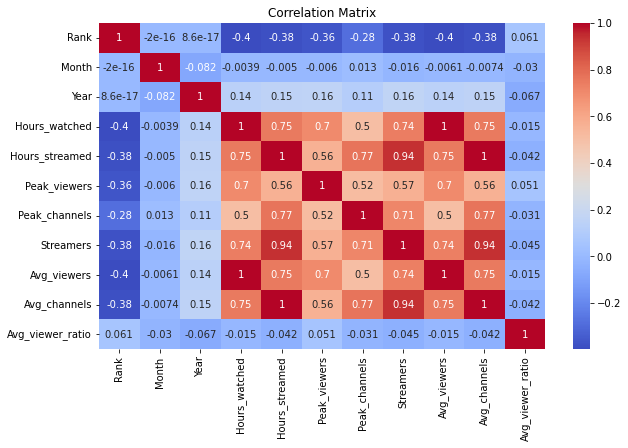

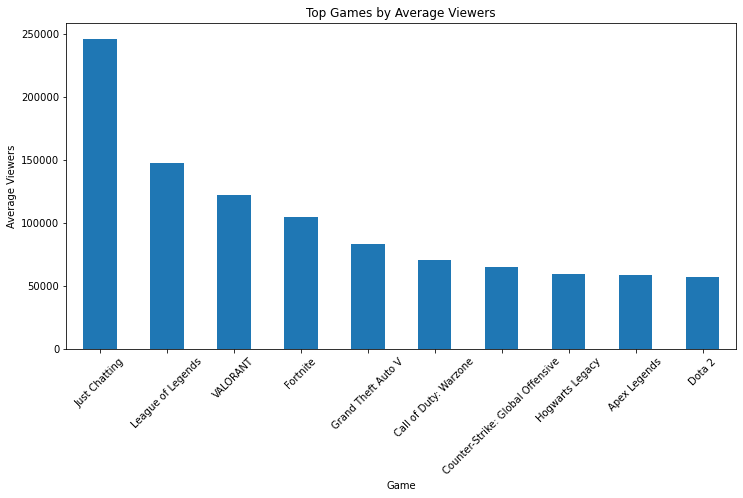

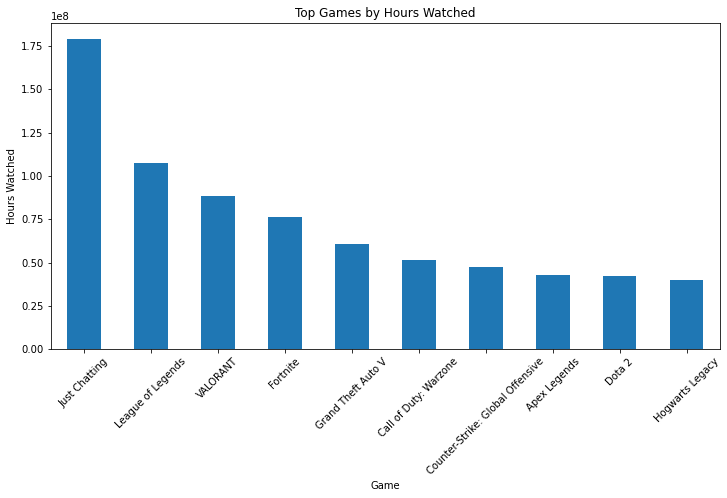

In [5]:
# Explore correlations between variables
correlation_matrix = twitch_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify games with the most average viewers
top_games = twitch_data.groupby('Game')['Avg_viewers'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_games.plot(kind='bar')
plt.title('Top Games by Average Viewers')
plt.xlabel('Game')
plt.ylabel('Average Viewers')
plt.xticks(rotation=45)
plt.show()

# Identify games with the most average viewers
top_games = twitch_data.groupby('Game')['Hours_watched'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_games.plot(kind='bar')
plt.title('Top Games by Hours Watched')
plt.xlabel('Game')
plt.ylabel('Hours Watched')
plt.xticks(rotation=45)
plt.show()

In [6]:
twitch_data = twitch_data.dropna()

In [7]:
#creating a histogram function to easily plot for various features
def histogram_plot(data, feature):
    plt.figure(figsize = (8,4))
    sns.histplot(data = data, x = feature, kde = True)
    plt.axvline(data[feature].mean(), color = "red", linestyle = "--")
    plt.show()

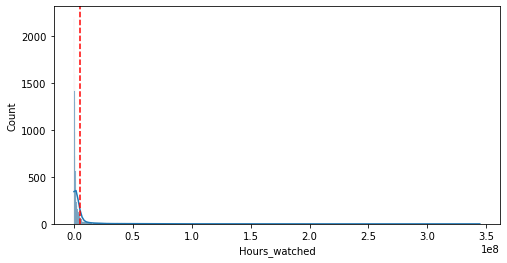

In [8]:
histogram_plot(twitch_data, 'Hours_watched')

In [9]:
twitch_data["log_hours_watched"] = np.log(twitch_data["Hours_watched"])

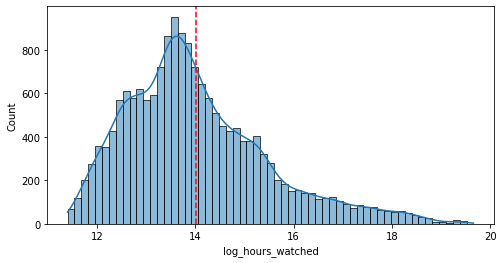

In [10]:
histogram_plot(twitch_data, 'log_hours_watched')

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_performance(model, predictor, target):
    """
    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictor)                     # Predict using the independent variables
    r2 = r2_score(target, pred)                         # To compute R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))    # To compute RMSE
    mae = mean_absolute_error(target, pred)             # To compute MAE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
        },
        index=[0],
    )

    return df_perf

In [12]:
# Prepare data for modeling
X = twitch_data.drop(['Rank', 'Month', 'Year', 'Avg_viewer_ratio', 'Hours_watched', 'log_hours_watched'], axis = 1)
y = twitch_data['log_hours_watched']

# Add the intercept term
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first = True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [13]:
#creating linear regression model and checking residuals
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

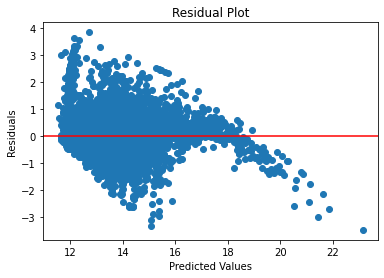

In [14]:
#checking residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

In [15]:
model_performance(linear_model, X_train, y_train)

,RMSE,MAE,R-squared
0,0.59768,0.435122,0.831178


In [16]:
model_performance(linear_model, X_test, y_test)

,RMSE,MAE,R-squared
0,0.776081,0.563372,0.714387


In [17]:
#creating ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [18]:
model_performance(ridge_model, X_train, y_train)

,RMSE,MAE,R-squared
0,0.618245,0.471293,0.81936


In [19]:
model_performance(ridge_model, X_test, y_test)

,RMSE,MAE,R-squared
0,0.702004,0.529824,0.766309


In [20]:
#creating lasso regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [21]:
model_performance(lasso_model, X_train, y_train)

,RMSE,MAE,R-squared
0,1.086166,0.873076,0.442449


In [22]:
model_performance(lasso_model, X_test, y_test)

,RMSE,MAE,R-squared
0,1.087124,0.878057,0.439569


In [23]:
#creating elastic net regression model
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [24]:
model_performance(elastic_model, X_train, y_train)

,RMSE,MAE,R-squared
0,1.086166,0.873071,0.442449


In [25]:
model_performance(elastic_model, X_test, y_test)

,RMSE,MAE,R-squared
0,1.087129,0.878056,0.439564


In [26]:
#creating a new DataFrame from Data so I can scale the continuous variables
scaled_X = twitch_data.drop(['Rank', 'Month', 'Year', 'Avg_viewer_ratio', 'Hours_watched', 'log_hours_watched'], axis = 1)
y = twitch_data['log_hours_watched']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#using MinMaxScaler to scale only continuous variables and ignoring categorial variables
num_X = scaled_X.select_dtypes(exclude=['object'])
scaled_X[num_X.columns] = scaler.fit_transform(num_X)

# Add the intercept term
scaled_X = sm.add_constant(scaled_X)
#encoding the categorial variables after I scaled the continuous data
scaled_X = pd.get_dummies(scaled_X, drop_first = True)

scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.30, random_state = 1)

In [27]:
#linear regression model with scaled data
scaled_linear = LinearRegression()
scaled_linear.fit(scaled_X_train, y_train)

LinearRegression()

In [28]:
model_performance(scaled_linear, scaled_X_train, y_train)

,RMSE,MAE,R-squared
0,0.592993,0.434033,0.832687


In [29]:
#ridge regression model with scaled data
scaled_ridge = Ridge()
scaled_ridge.fit(scaled_X_train, y_train)

Ridge()

In [30]:
model_performance(scaled_ridge, scaled_X_train, y_train)

,RMSE,MAE,R-squared
0,0.611018,0.465664,0.822361


In [31]:
model_performance(scaled_ridge, scaled_X_test, y_test)

,RMSE,MAE,R-squared
0,0.723751,0.544585,0.755522


In [32]:
scaled_X.describe().T

,count,mean,std,min,25%,50%,75%,max
const,17399.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0
Hours_streamed,17399.0,0.016991,0.054141,0.0,0.001379,0.003580,0.009750,1.0
Peak_viewers,17399.0,0.018081,0.043963,0.0,0.002622,0.006490,0.015197,1.0
Peak_channels,17399.0,0.004945,0.020614,0.0,0.000439,0.001078,0.002741,1.0
Streamers,17399.0,0.020555,0.062155,0.0,0.001702,0.004732,0.012545,1.0
...,...,...,...,...,...,...,...,...
Game_osu!,17399.0,0.005000,0.070538,0.0,0.000000,0.000000,0.000000,1.0
Game_rFactor 2,17399.0,0.000057,0.007581,0.0,0.000000,0.000000,0.000000,1.0
Game_skribbl.io,17399.0,0.000402,0.020055,0.0,0.000000,0.000000,0.000000,1.0
Game_some some convenience store,17399.0,0.000057,0.007581,0.0,0.000000,0.000000,0.000000,1.0


In [36]:
#creating final model and running cross validation withg 10 folds
final_model = Ridge() 
final_model.fit(scaled_X_train, y_train)
cv_scores = cross_val_score(final_model, scaled_X, y, cv=10, scoring='r2')

print("Cross-Validation R-squared Scores:")
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: {score:.4f}")
print(f"Mean CV R-squared: {np.mean(cv_scores):.4f}")

Cross-Validation R-squared Scores:
Fold 1: 0.4641
Fold 2: 0.5747
Fold 3: 0.6787
Fold 4: 0.7100
Fold 5: 0.7251
Fold 6: 0.7519
Fold 7: 0.6978
Fold 8: 0.6525
Fold 9: 0.7002
Fold 10: 0.6319
Mean CV R-squared: 0.6587


In [37]:
#plotting Ridge coefficients as a function of the regularization
n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(scaled_X_train, y_train)
    coefs.append(ridge.coef_)

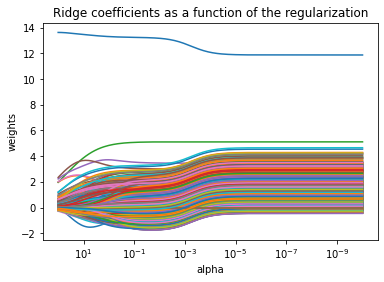

In [38]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
params = {'alpha' : [0.001, 0.01, 0.1, 0.5, 0.9, 1.0, 3.0]}
ridgemodel = Ridge()
#gridsearchcv on the ridgemodel using various alphas and doing 5 cross folds
model_cv = GridSearchCV(estimator = ridgemodel, param_grid = params, scoring = 'r2', cv = 10)
model_cv.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.9, 1.0, 3.0]},
             scoring='r2')

In [40]:
#getting best alpha value
model_cv.best_params_

{'alpha': 0.9}

In [41]:
#creating Ridge Regression model using the best alpha 
scaledmodel = Ridge(alpha = 0.9)
scaledmodel.fit(scaled_X_train, y_train)

Ridge(alpha=0.9)

In [42]:
model_performance(scaledmodel, scaled_X_train, y_train)

,RMSE,MAE,R-squared
0,0.608811,0.463165,0.823641


In [43]:
model_performance(scaledmodel, scaled_X_test, y_test)

,RMSE,MAE,R-squared
0,0.723537,0.544009,0.755667


In [44]:
#running cross validation with updated final model with specified alpha value
final_model = Ridge(alpha = 0.9) 
final_model.fit(scaled_X_train, y_train)
cv_scores = cross_val_score(final_model, scaled_X, y, cv=10, scoring='r2')

print("Cross-Validation R-squared Scores:")
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: {score:.4f}")
print(f"Mean CV R-squared: {np.mean(cv_scores):.4f}")

Cross-Validation R-squared Scores:
Fold 1: 0.4661
Fold 2: 0.5760
Fold 3: 0.6796
Fold 4: 0.7100
Fold 5: 0.7245
Fold 6: 0.7512
Fold 7: 0.6973
Fold 8: 0.6525
Fold 9: 0.7000
Fold 10: 0.6298
Mean CV R-squared: 0.6587
